In [6]:
import requests
import json
import os
from dotenv import load_dotenv
import pandas as pd
import folium
import openrouteservice as ors
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def get_token():
    load_dotenv('./.env')
    email = os.environ.get("email")
    password = os.environ.get("password")
    client_id = os.environ.get("X-ClientId")
    pass_key = os.environ.get("passKey")
    url = "https://openapi.emtmadrid.es/v3/mobilitylabs/user/login/"
    headers = {"email": email, "password" : password}
    response = requests.get(url, headers=headers)
    return response.content

In [8]:
get_token()

b'{"code": "01", "description": "Token extend  into control-cache Data recovered  OK, (lapsed: 401 millsecs)", "datetime": "2024-03-14T17:44:29.477709", "data": [{"XClientId": "09141f1a-bf02-4e23-80ee-e7fa7ea819d2", "nameApp": "OPENAPI MobilityLabs", "updatedAt": "2024-02-02T14:01:48.5770000", "userName": "silviluliuma", "lastUpdate": {"$date": 1710434740603}, "idUser": "26ddfea8-f2ce-438f-89e4-5110c9abd07e", "priv": "U", "tokenSecExpiration": 86399, "email": "valeromsilvia@gmail.com", "tokenDteExpiration": {"$date": 1710524739603}, "flagAdvise": true, "accessToken": "42af1399-2232-4ae6-a5d5-5764b3b3c78f", "apiCounter": {"current": 5606, "dailyUse": 20000, "owner": 0, "licenceUse": "Please mention EMT Madrid MobilityLabs as data source. Thank you and enjoy!", "aboutUses": "If you need to extend the daily use of this API, please, register your App in Mobilitylabs and use your own X-ClientId and  passKey instead of generic login (more info in https://mobilitylabs.emtmadrid.es/doc/new-app

In [9]:
def get_stations():
    load_dotenv('./.env')
    token = os.environ.get("access_token")
    print(token)
    url = "https://openapi.emtmadrid.es/v3/transport/bicimad/stations/"
    headers = {"accessToken" : token}
    response = requests.get(url, headers = headers).json()
    return response

In [10]:
get_stations()

42af1399-2232-4ae6-a5d5-5764b3b3c78f


{'code': '00',
 'description': '612 bases recovered',
 'datetime': '2024-03-14T17:45:45.056296',
 'data': [{'activate': 1,
   'address': 'Calle Miguel Moya nº 1,',
   'code_district': '01',
   'code_suburb': '015',
   'dock_bikes': 10,
   'free_bases': 17,
   'geofence': {'type': 'Polygon',
    'coordinates': [[[-3.7062791280000003, 40.420850278],
      [-3.7062791280000003, 40.419949722000005],
      [-3.705100872, 40.419949722000005],
      [-3.705100872, 40.420850278],
      [-3.7062791280000003, 40.420850278]]]},
   'geofenced_capacity': 20,
   'geometry': {'type': 'Point', 'coordinates': [-3.70569, 40.4204]},
   'id': 1406,
   'integrator': '3c34ea72-2a03-4a3c-be97-cf32be4b0ebe',
   'light': 2,
   'name': '2 - Metro Callao',
   'no_available': 0,
   'number': '2',
   'reservations_count': 0,
   'tipo_estacionPBSC': 'FIXED',
   'total_bases': 27,
   'virtualDelete': False,
   'virtual_bikes': [],
   'virtual_bikes_num': 0,
   'bikesGo': []},
  {'activate': 1,
   'address': 'Plaza C

In [11]:
stations = get_stations()
stations_real_time = pd.DataFrame(stations["data"])


42af1399-2232-4ae6-a5d5-5764b3b3c78f


In [12]:
stations_real_time[["longitude", "latitude"]] = stations_real_time["geometry"].apply(lambda x: pd.Series(x["coordinates"]))
stations_real_time = stations_real_time.drop(["geofence", "activate", "geometry", "integrator", "reservations_count", "no_available", "tipo_estacionPBSC", "virtualDelete", "virtual_bikes", "virtual_bikes_num", "code_suburb", "geofenced_capacity", "bikesGo"], axis=1)
stations_real_time['coordinates'] = list(zip(stations_real_time['longitude'], stations_real_time['latitude']))
stations_real_time

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
0,"Calle Miguel Moya nº 1,",01,10,17,1406,2,2 - Metro Callao,2,27,-3.705690,40.420400,"(-3.70569, 40.4204)"
1,"Plaza Conde Surchill, 4 ,",07,11,8,1407,2,3 - Plaza Conde Suchil,3,19,-3.707254,40.430322,"(-3.7072537, 40.4303223)"
2,"Calle Fuencarral nº 106,",01,25,2,1409,1,5 - Fuencarral,5,27,-3.702135,40.428521,"(-3.7021354, 40.4285212)"
3,"Calle Hortaleza nº 63,",01,12,7,1410,2,6 - Colegio Arquitectos,6,19,-3.698447,40.424148,"(-3.698447, 40.424148)"
4,"Calle Hortaleza nº 75,",01,4,15,1411,0,7 - Hortaleza,7,19,-3.697771,40.425191,"(-3.6977715, 40.4251906)"
...,...,...,...,...,...,...,...,...,...,...,...,...
607,"Campuzano, 1,",15,8,15,1965,2,482 - Metro Pueblo Nuevo,482,23,-3.642339,40.435687,"(-3.6423386, 40.4356873)"
608,"Calle de las Delicias, 41 ,",02,7,12,2117,2,273 - Delicias - General Lacy,273,19,-3.690918,40.403819,"(-3.69091831, 40.40381914)"
609,"Calle Camilo José Cela, 27,",04,13,10,1647,2,241 - Camilo José Cela,241,23,-3.667790,40.437800,"(-3.66779, 40.4378)"
610,"Ronda de Atocha nº 34,",01,17,10,1453,2,49 - Casa Encendida,49,27,-3.699277,40.406053,"(-3.6992774, 40.4060533)"


In [13]:
def get_district(df, district_number):
    result = df[df["code_district"] == district_number]
    return result

district_01 = get_district(stations_real_time, "01")
len(district_01)

61

In [14]:
district_01 = stations_real_time[stations_real_time["code_district"]== "01"]
district_02 = stations_real_time[stations_real_time["code_district"]== "02"]
district_03 = stations_real_time[stations_real_time["code_district"]== "03"]
district_04 = stations_real_time[stations_real_time["code_district"]== "04"]
district_05 = stations_real_time[stations_real_time["code_district"]== "05"]
district_06 = stations_real_time[stations_real_time["code_district"]== "06"]
district_07 = stations_real_time[stations_real_time["code_district"]== "07"]
district_08 = stations_real_time[stations_real_time["code_district"]== "08"]
district_09 = stations_real_time[stations_real_time["code_district"]== "09"]
district_10 = stations_real_time[stations_real_time["code_district"]== "10"]
district_11 = stations_real_time[stations_real_time["code_district"]== "11"]
district_12 = stations_real_time[stations_real_time["code_district"]== "12"]
district_13 = stations_real_time[stations_real_time["code_district"]== "13"]
district_14 = stations_real_time[stations_real_time["code_district"]== "14"]
district_15 = stations_real_time[stations_real_time["code_district"]== "15"]
district_16 = stations_real_time[stations_real_time["code_district"]== "16"]
district_17 = stations_real_time[stations_real_time["code_district"]== "17"]
district_18 = stations_real_time[stations_real_time["code_district"]== "18"]
district_19 = stations_real_time[stations_real_time["code_district"]== "19"]
district_20 = stations_real_time[stations_real_time["code_district"]== "20"]
district_21 = stations_real_time[stations_real_time["code_district"]== "21"]

In [15]:
district_02

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
43,"Calle Ribera de Curtidores nº 28,",02,19,8,1450,1,46 - Ribera de Curtidores,46,27,-3.707126,40.405315,"(-3.7071259, 40.4053153)"
44,"Plaza Embajadores, 7 ,",02,4,20,1451,0,47 - Renfe/Cercanías Embajadores,47,24,-3.702800,40.404577,"(-3.7027998, 40.4045772)"
112,Calle Juan Martínez el empeciado (esquina call...,02,9,14,1524,2,"118 - OFICINA DEL SER, APR Y BICIREGISTRO",118,23,-3.688241,40.400781,"(-3.6882407, 40.400781)"
113,"Calle Méndez Álvaro nº 11,",02,15,8,1525,2,119 - Méndez Álvaro,119,23,-3.686265,40.401291,"(-3.6862653, 40.4012905)"
114,"Calle Palos de la Frontera nº 27,",02,16,11,1526,2,120 - Metro Palos de la Frontera,120,27,-3.694825,40.403090,"(-3.6948251018524214, 40.403090451430614)"
115,"Paseo de Santa María de la Cabeza nº 58,",02,8,19,1527,0,121 - Glorieta de Santa María de la Cabeza,121,27,-3.698603,40.401749,"(-3.6986027, 40.4017487)"
189,"Paseo de la Chopera, 31 ,Comunidad de Madrid E...",02,8,15,2205,2,267 - Paseo de la Chopera - Fernando Poo,267,23,-3.700400,40.395000,"(-3.7003996647238746, 40.39500000000003)"
208,"Paseo de los Melancólicos, 73 ,",02,16,7,2247,2,280 - Ps de los Melancólicos - San Epifanio,280,23,-3.718569,40.401782,"(-3.718569, 40.401782)"
225,"Calle Amaltea, 1 ,",02,9,15,2265,2,271 - Amaltea-Meneses,271,24,-3.683170,40.394706,"(-3.68317, 40.394706)"
227,"Paseo Juan Antonio Vallejo-Nájera Botas, 25 ,",02,17,6,2267,1,"275 - Juan Antonio Vallejo-Nájera Botas, 25",275,23,-3.708212,40.402054,"(-3.7082123, 40.4020545)"


In [16]:
def get_light1(df):
    df_light1 = df[df["light"]==1]
    return df_light1

In [17]:
len(get_light1(district_01))

12

In [18]:
def get_light0(df):
    df_light0 = df[df["light"]==0]
    return df_light0

In [19]:
get_light0(district_02)

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
44,"Plaza Embajadores, 7 ,",02,4,20,1451,0,47 - Renfe/Cercanías Embajadores,47,24,-3.702800,40.404577,"(-3.7027998, 40.4045772)"
115,"Paseo de Santa María de la Cabeza nº 58,",02,8,19,1527,0,121 - Glorieta de Santa María de la Cabeza,121,27,-3.698603,40.401749,"(-3.6986027, 40.4017487)"
229,"Calle Méndez Álvaro, 73 ,",02,7,16,2269,0,274 - Estación Sur Méndez Álvaro A,274,23,-3.681343,40.396758,"(-3.68134346, 40.39675755)"
314,"Paseo Santa María de la Cabeza frente al 30 ,",02,3,20,1574,0,168 - Santa María Cabeza - Batalla del Salado,168,23,-3.695900,40.404600,"(-3.6959, 40.4046)"
438,"Calle Puerto Serrano, 1 enfrente del nº 6 ,",02,6,17,1986,0,265 - Puerto Serrano - Embajadores,265,23,-3.688461,40.385412,"(-3.688461, 40.385412)"
517,Calle Teresa López Valcarcel (esquina calle Te...,02,7,17,2071,0,270 - Teresa L. Valcárcel - Tte. Cnel. Noreña,270,24,-3.693288,40.388629,"(-3.69328771, 40.38862908)"


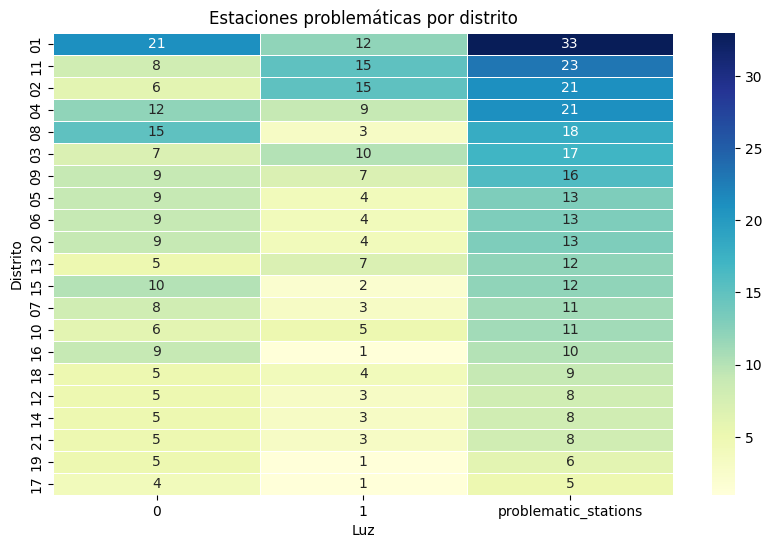

In [20]:
lights_df_sum = stations_real_time.pivot_table(index='code_district', columns='light', aggfunc='size', fill_value=0)

lights_df_sum = lights_df_sum.drop([2, 3], axis=1)
lights_df_sum["problematic_stations"] = lights_df_sum[0] +lights_df_sum[1]
lights_df_sum_sorted = lights_df_sum.sort_values(by="problematic_stations", ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(lights_df_sum_sorted, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Estaciones problemáticas por distrito')
plt.xlabel('Luz')
plt.ylabel('Distrito')
plt.show()

In [21]:
districts_ordered = lights_df_sum_sorted.index.tolist()
districts_ordered

['01',
 '11',
 '02',
 '04',
 '08',
 '03',
 '09',
 '05',
 '06',
 '20',
 '13',
 '15',
 '07',
 '10',
 '16',
 '18',
 '12',
 '14',
 '21',
 '19',
 '17']

In [22]:
def find_nearest_to_coords(df, coords):
    station_coordinates = df['coordinates'].tolist()
    nearest_station = min(station_coordinates, key=lambda coord: great_circle(coord, vehicle_start).meters)
    return nearest_station

In [23]:
stations_real_time

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
0,"Calle Miguel Moya nº 1,",01,10,17,1406,2,2 - Metro Callao,2,27,-3.705690,40.420400,"(-3.70569, 40.4204)"
1,"Plaza Conde Surchill, 4 ,",07,11,8,1407,2,3 - Plaza Conde Suchil,3,19,-3.707254,40.430322,"(-3.7072537, 40.4303223)"
2,"Calle Fuencarral nº 106,",01,25,2,1409,1,5 - Fuencarral,5,27,-3.702135,40.428521,"(-3.7021354, 40.4285212)"
3,"Calle Hortaleza nº 63,",01,12,7,1410,2,6 - Colegio Arquitectos,6,19,-3.698447,40.424148,"(-3.698447, 40.424148)"
4,"Calle Hortaleza nº 75,",01,4,15,1411,0,7 - Hortaleza,7,19,-3.697771,40.425191,"(-3.6977715, 40.4251906)"
...,...,...,...,...,...,...,...,...,...,...,...,...
607,"Campuzano, 1,",15,8,15,1965,2,482 - Metro Pueblo Nuevo,482,23,-3.642339,40.435687,"(-3.6423386, 40.4356873)"
608,"Calle de las Delicias, 41 ,",02,7,12,2117,2,273 - Delicias - General Lacy,273,19,-3.690918,40.403819,"(-3.69091831, 40.40381914)"
609,"Calle Camilo José Cela, 27,",04,13,10,1647,2,241 - Camilo José Cela,241,23,-3.667790,40.437800,"(-3.66779, 40.4378)"
610,"Ronda de Atocha nº 34,",01,17,10,1453,2,49 - Casa Encendida,49,27,-3.699277,40.406053,"(-3.6992774, 40.4060533)"


In [17]:
load_dotenv('../.env')
client = ors.Client(key=os.environ.get("openroute_api_key"))

# Function to find the nearest station to given coordinates
def find_nearest_to_coords(df, coords):
    station_coordinates = df['coordinates'].tolist()
    nearest_station = min(station_coordinates, key=lambda coord: great_circle(coord, coords).meters)
    return nearest_station

# Function to create a route between two sets of coordinates
def create_route(client, start_coords, end_coords):
    return client.directions(
        coordinates=[start_coords, end_coords],
        profile='driving-car',
        format='geojson'
    )

# Coordenadas de inicio (supongo que empiezan la ruta en la central de la EMT)
vehicle_start = [-3.6823731969472644, 40.46209827032537]

# Creo un mapa con Folium
m = folium.Map(location=[vehicle_start[1], vehicle_start[0]], zoom_start=12)

# Añado marcador morado para la central (vehicle_start)
folium.Marker(location=[vehicle_start[1], vehicle_start[0]], popup='CENTRAL EMT', icon=folium.Icon(color='purple')).add_to(m)

distrito02_low = get_light0(district_02).copy()
distrito02_high = get_light1(district_02).copy()

distrito02_high['visited'] = False
distrito02_low['visited'] = False

# Inicio de la ruta
current_coords = vehicle_start
van = "empty"

coords_list = [current_coords]

stop_counter = 1

for i in range(100):
    if van == "empty":
        current_coords = coords_list[-1]
        # Verifica si quedan estaciones sin visitar
        if not distrito02_high.loc[~distrito02_high['visited'] & (distrito02_high['light'] == 1)].empty:
            nearest_station = find_nearest_to_coords(distrito02_high.loc[~distrito02_high['visited'] & (distrito02_high['light'] == 1)], current_coords)
            coords_list.append(nearest_station)
            # Actualiza 'visited' y 'light' en el DataFrame original
            distrito02_high.loc[distrito02_high['coordinates'] == nearest_station, 'visited'] = True
            distrito02_high.loc[distrito02_high['coordinates'] == nearest_station, 'light'] = 2
            route = create_route(client, coords_list[-2], coords_list[-1])
            van = "full"
            folium.Marker(location=[nearest_station[1], nearest_station[0]],
                          popup=f"Station with high occupation\nNumber: {stop_counter}",
                          icon=folium.Icon(color='orange')).add_to(m)
            stop_counter += 1
            folium.PolyLine(locations=[coord[::-1] for coord in route['features'][0]['geometry']['coordinates']],
                            color='red').add_to(m)
    elif van == "full":
        current_coords = coords_list[-1]
        # Verifica si quedan estaciones sin visitar
        if not distrito02_low.loc[~distrito02_low['visited'] & (distrito02_low['light'] == 0)].empty:
            nearest_station = find_nearest_to_coords(distrito02_low.loc[~distrito02_low['visited'] & (distrito02_low['light'] == 0)], current_coords)
            coords_list.append(nearest_station)
            # Actualiza 'visited' y 'light' en el DataFrame original
            distrito02_low.loc[distrito02_low['coordinates'] == nearest_station, 'visited'] = True
            distrito02_low.loc[distrito02_low['coordinates'] == nearest_station, 'light'] = 2
            route = create_route(client, coords_list[-2], coords_list[-1])
            van = "empty"
            folium.Marker(location=[nearest_station[1], nearest_station[0]],
                          popup=f"Station with low occupation\nNumber: {stop_counter}",
                          icon=folium.Icon(color='green')).add_to(m)
            stop_counter += 1
            folium.PolyLine(locations=[coord[::-1] for coord in route['features'][0]['geometry']['coordinates']],
                            color='red').add_to(m)
final_route = create_route(client, coords_list[-1], vehicle_start)
folium.PolyLine(locations=[coord[::-1] for coord in final_route['features'][0]['geometry']['coordinates']],
                            color='red').add_to(m)
print(coords_list)
m

[[-3.6823731969472644, 40.46209827032537], (-3.7071259, 40.4053153), (-3.7184816, 40.4104448), (-3.721178, 40.411622), (-3.6862653, 40.4012905), (-3.67970176633988, 40.393023802369754), (-3.688461, 40.385412), (-3.691076, 40.389041)]
